In [2]:
%pip install pandas
%pip install matplotlib
%pip install mplsoccer



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch

In [4]:
df = pd.read_csv('./data/shots_data_EPL_2024.csv')
players_df = pd.read_csv('./data/player_data_EPL_2024.csv')

In [5]:
df['Shot X'] = df['Shot X'] * 100
df['Shot Y'] = df['Shot Y'] * 100

In [6]:
df.head()

,Player ID,Player Name,Shot X,Shot Y,Is Goal,Result,Shot Minute
0,8260,Erling Haaland,92.599998,53.599998,True,Goal,17
1,8260,Erling Haaland,86.599998,47.599998,False,SavedShot,51
2,8260,Erling Haaland,88.500000,50.000000,True,Goal,11
3,8260,Erling Haaland,92.099998,69.199997,True,Goal,15
4,8260,Erling Haaland,89.000000,48.400002,False,MissedShots,32


In [7]:
total_shots_df = df.groupby('Player ID').size().reset_index(name='Total Shots')

# Merge the total shots data back into the shots_x_y DataFrame
df = pd.merge(df, total_shots_df, on='Player ID')
players_df = players_df.rename(columns={'id': 'Player ID'})
df = pd.merge(df, players_df[['Player ID', 'goals']], on='Player ID', how='left')

In [8]:
players_df.head()

,Player ID,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,7,630,10,6.058263,0,0.725297,35,4,1,0,F,Manchester City,9,5.297095,5.588318,0.748914
1,6552,Bryan Mbeumo,7,630,6,2.873613,0,2.247806,16,14,2,0,F M,Brentford,5,2.112444,5.011298,1.508385
2,8497,Cole Palmer,7,606,6,3.284160,5,4.842092,24,23,3,0,M,Chelsea,5,2.522991,7.751567,1.391380
3,10408,Luis Díaz,7,466,5,3.459168,1,1.377988,15,10,0,0,M S,Liverpool,5,3.459168,7.591729,2.918743
4,501,Danny Welbeck,7,616,4,3.714565,1,0.516876,19,8,1,0,F,Brighton,4,3.714565,5.406683,1.860859


In [41]:
df['xG_Per_Shot'] = players_df['xG'] / df['Total Shots']
players_df['points_avg_dist'] = df['Shot X'].mean()
players_df['actual_avg_dist'] = 120 - (df['Shot X'] * 1.2).mean()

df.to_csv('./data/players_shots_data_EPL_2024_updated.csv', index=False)
players_df.to_csv('./data/players_data_EPL_2024_updated.csv', index=False)

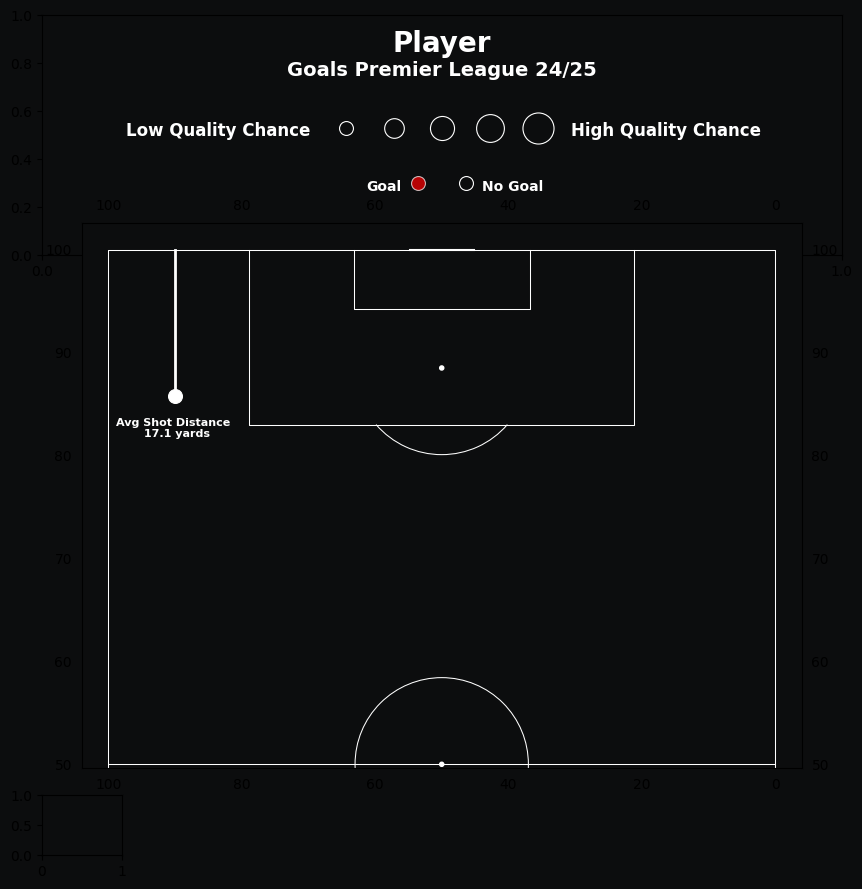

In [ ]:
bg_color = "#0c0d0e"

fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(bg_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(bg_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(x=.5, y=.85, s='Player', fontsize=20, fontweight='bold', color='white', ha='center')

ax1.text(x=.5, y=.75, s='Goals Premier League 24/25', fontsize=14,fontweight='bold', color='white', ha='center')

ax1.text(x=.22, y=.5, s='Low Quality Chance', fontsize=12,fontweight='bold', color='white', ha='center')

ax1.text(x=.78, y=.5, s='High Quality Chance', fontsize=12,fontweight='bold', color='white', ha='center')

ax1.scatter(x=.38,y=.53,s=100,color=bg_color,edgecolor='white', linewidth=.8)

ax1.scatter(x=.44,y=.53,s=200,color=bg_color,edgecolor='white', linewidth=.8)

ax1.scatter(x=.5,y=.53,s=300,color=bg_color,edgecolor='white', linewidth=.8)

ax1.scatter(x=.56,y=.53,s=400,color=bg_color,edgecolor='white', linewidth=.8)

ax1.scatter(x=.62,y=.53,s=500,color=bg_color,edgecolor='white', linewidth=.8)

ax1.text(x=.45, y=.27, s=f'Goal', fontsize=10, fontweight='bold', color='white', ha='right')

ax1.scatter(x=.47,y=.3, s=100,color='red',edgecolor='white', linewidth=.8, alpha=.7)

ax1.scatter(x=.53,y=.3, s=100,color=bg_color,edgecolor='white', linewidth=.8)

ax1.text(x=.55, y=.27, s=f'No Goal', fontsize=10, fontweight='bold', color='white', ha='left')



ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(bg_color)

pitch = VerticalPitch(pitch_type='opta',half=True, pitch_color=bg_color, pad_bottom=.5, line_color='white', linewidth=.75, axis=True, label=True)

pitch.draw(ax=ax2)

ax2.scatter(x=90, y=points_avg_dist, s=100, color='white', linewidth=.8)

ax2.plot([90, 90], [100, points_avg_dist], color='white', linewidth=2)

ax2.text(x=90, y=points_avg_dist - 4, s=f'Avg Shot Distance \n {actual_avg_dist:.1f} yards', fontsize=8, fontweight='bold', color='white', ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(x['Shot X'], x['Shot Y'], s=x['xG_Per_Shot'] * 300, color='red' if x['goals'] > 0 else bg_color, ax=ax2, edgecolor='white', linewidth=.8, alpha=.7)

ax3 = fig.add_axes([0, .2, .1, .05])
ax3.set_facecolor(bg_color)